# LOADING MODULES AND DATA SETS

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import eli5
import matplotlib.pyplot as plt 
from scipy.stats import skew 

import xgboost as xgbs
%matplotlib inline

In [2]:
data_train = r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/Housing_train.csv'
house_train = pd.read_csv(data_train)

In [3]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test = r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/Housing_test.csv'
house_test = pd.read_csv(data_test)

In [5]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# BIVARIATE ANALYSIS AND FEATURE ENGINEERING

In [6]:
house_train.shape

(1460, 81)

In [7]:
house_test.shape

(1459, 80)

In [8]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
house_train.nunique().to_dict()

{'Id': 1460,
 'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 1073,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 4,
 'MasVnrArea': 327,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinSF1': 637,
 'BsmtFinType2': 6,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,

In [10]:
house_train.isnull().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [11]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


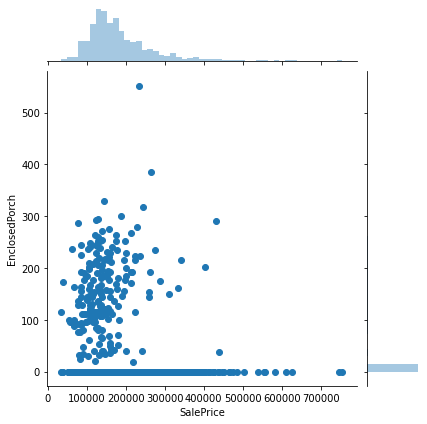

In [12]:
sns.jointplot(x = "SalePrice", y = 'EnclosedPorch', data = house_train)

# TRAIN TEST SPLIT

In [13]:
x_train,x_test = train_test_split(house_train,test_size=0.2,random_state = 1)

In [14]:
x_train1 = x_train.drop(["Id","SalePrice"],1)
y_train1 = x_train["SalePrice"]

In [15]:
x_test1 = x_test.drop(["Id","SalePrice"],1)
y_test1 = x_test["SalePrice"]

# CREATING MODEL TRANSFORMER & PIPELINE

In [16]:
nums_cols = x_train1.select_dtypes(np.number).columns
char_cols = x_train1.select_dtypes(object).columns

In [17]:
nums_cols,char_cols

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'Hea

In [20]:
def skewness(dFrame):
    skewness = dFrame(lambda x: skew(x))
    skewness = skewness[abs(skewness) > 0.5]
    print(str(skewness.shape[0]) + " skewed numerical features to log transform")
    skewed_features = skewness.index
    dFrame[skewed_features] = np.log1p(dFrame[skewed_features])
    return dFrame

In [21]:
nums_cols = skewness(nums_cols)

TypeError: 'Index' object is not callable

In [ ]:
pipe_num= make_pipeline(SimpleImputer(strategy="median"),MinMaxScaler())
pipe_char=make_pipeline(SimpleImputer(strategy="constant",fill_value="Missing"),
                       OneHotEncoder(handle_unknown="ignore"))

In [ ]:
ctrans = make_column_transformer((pipe_num,nums_cols),(pipe_char,char_cols))

In [ ]:
ctrans.fit_transform(x_train1)

In [ ]:
ctrans.transform(house_test)

# LINEAR REGRESSION

In [ ]:
lm = LinearRegression()

In [ ]:
lm

In [ ]:
pipe = make_pipeline(ctrans,lm)

In [ ]:
pipe

In [ ]:
pipe.fit(x_train1,y_train1)

In [ ]:
pipe.predict(x_train1)

In [ ]:
pipe.predict(x_test1)

# MEAN ABSOLUTE ERROR (RMSE)

In [ ]:
rmse1 = mean_absolute_error(y_train1,pipe.predict(x_train1))

In [ ]:
rmse2 = mean_absolute_error(y_test1,pipe.predict(x_test1))

In [ ]:
rmse1

In [ ]:
rmse2

In [ ]:
pipe.predict(house_test)

In [ ]:
#final_pred_test = pipe.predict(house_test)

In [ ]:
#len(final_pred_test)

In [ ]:
#submission = pd.DataFrame(data = final_pred_test)

In [ ]:
#submission.columns=["SalePrice"]

In [ ]:
#submission["Id"]=house_test.Id

In [ ]:
#submission.head()

In [ ]:
#submission=submission[["Id","SalePrice"]]

In [ ]:
#submission.to_csv("House_SalePrice.csv",index=False)

# GRID SEARCH CV (USING LASSO AND RIDGE)

In [ ]:
lasso_params = {"classifier__alpha":[0.02, 0.024, 0.025, 0.026, 0.03]}

In [ ]:
lasso = Lasso()

In [ ]:
model_pipeline=Pipeline([("Preprocessor",ctrans),("classifier",Lasso())])

In [ ]:
model_pipeline

In [ ]:
grid=GridSearchCV(model_pipeline,param_grid=lasso_params,cv=5)

In [ ]:
grid

In [ ]:
grid.fit(x_train1,y_train1)

In [ ]:
grid.predict(x_train1)

In [ ]:
mean_absolute_error(y_train1,grid.predict(x_train1))

In [ ]:
mean_absolute_error(y_test1,grid.predict(x_test1))

In [ ]:
pd.DataFrame(grid.cv_results_)

# XGBOOST

In [ ]:
strings="xgb__"
parameters = {
    'max_depth':range(2,10,1),
    'n_estimators': [40,60,100,150],
    'learning_rate': [0.1, 0.01,0.05], #shrinkage.. reduces overfitting
    'reg_lambda':[0.1,0.01,1,10],
    'reg_alpha':[0.1,0.01,1,10],
}

In [ ]:
parameters.items()

In [ ]:
xgb_params={strings+k:v for k,v in parameters.items()}

In [ ]:
xgb_params

In [ ]:
xgb=xgbs.XGBRegressor()
pipe=Pipeline([("columntransfer",ctrans),("xgb",xgb)])

In [ ]:
grid=RandomizedSearchCV(pipe,xgb_params,cv=5,scoring="neg_mean_absolute_error")

In [ ]:
grid

In [ ]:
grid.fit(x_train1,y_train1);

In [ ]:
grid.predict(x_train1)

In [ ]:
mean_absolute_error(y_train1,grid.predict(x_train1))

In [ ]:
mean_absolute_error(y_test1,grid.predict(x_test1))

In [ ]:
final_pred_test = grid.predict(house_test)

In [ ]:
submission = pd.DataFrame(data = final_pred_test)

In [ ]:
submission.columns=["SalePrice"]

In [ ]:
submission["Id"]=house_test.Id

In [ ]:
submission=submission[["Id","SalePrice"]]

In [ ]:
submission.to_csv("House_SalePrice1.csv",index=False)

In [ ]:
submission.head()